In [1]:
!pip install stockstats

In [41]:
!pip install yfinance

  Created wheel for import: filename=import-0.0.1-py3-none-any.whl size=1529 sha256=6c4cdb9d482a492c31391ee92f59122a025e70ab7a326cbd39b0a21b28f3385a
  Stored in directory: /Users/LiviaChen/Library/Caches/pip/wheels/b0/b0/37/8e17c99d2fb8bc334aa69e079f4e92e7f4a086bb4428c6a7c2
Successfully built import
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from stockstats import StockDataFrame
from pandas_datareader import data as web
from datetime import datetime
import yfinance as yf

In [21]:
class Stock_analytics_index(): # 建立股票類別
    def __init__(self, stock):
        self.__stock = str(stock)
        self.__start_date = datetime(2000, 1, 1)
        self.__end_date = datetime.now()
        self.__get_stock_data()
    def __get_stock_data(self): # 從 yfinance 拿取股價資料
        df = web.get_data_yahoo(self.__stock, self.__start_date, self.__end_date)
        analysis = f'./{self.__stock}data.csv'
        df.to_csv(analysis) # 在當前資料夾產生該股票的股價資料
        data = pd.read_csv(analysis, parse_dates=True, index_col='Date')
        price = data["Close"]
        self.__stock = StockDataFrame.retype(pd.read_csv(analysis))
        
    def get_rsv_9(self): # 取得該股票的RSV
        return self.__stock.get('rsv_9')
    
    def get_rsi_6(self): # 取得該股票的RSI, RSI(6)
        return self.__stock.get('rsi_6')
    
    def get_rsi_9(self): # 取得該股票的RSI, RSI(9)
        return self.__stock.get('rsi_9')
    
    def get_macd(self): # 取得該股票的MACD
        return self.__stock['macd']
    
    def get_macd_12(self): # 取得該股票的MACD, n=12
        return self.__stock['close_12_ema']
    
    def get_macd_26(self): # 取得該股票的MACD, m=26
        return self.__stock['close_26_ema']
    
    def get_macd_9(self): # 取得該股票的MACD, x=9
        return self.__stock['close_9_ema']

        
        

In [22]:
msft = Stock_analytics_index('msft')

In [23]:
msft.get_rsv_9()

date
1999-12-31    33.333333
2000-01-03    68.867925
2000-01-04     9.433962
2000-01-05    47.972973
2000-01-06    15.853659
                ...    
2021-01-06     2.034106
2021-01-07    41.666633
2021-01-08    50.393685
2021-01-11    36.417366
2021-01-12    21.840684
Name: rsv_9, Length: 5292, dtype: float64

In [24]:
msft.get_rsi_6()

date
1999-12-31          NaN
2000-01-03     0.000000
2000-01-04     0.000000
2000-01-05    25.821065
2000-01-06    12.944249
                ...    
2021-01-06    23.678695
2021-01-07    48.388265
2021-01-08    52.455650
2021-01-11    45.556112
2021-01-12    38.292012
Name: rsi_6, Length: 5292, dtype: float64

In [25]:
msft.get_rsi_9()

date
1999-12-31          NaN
2000-01-03     0.000000
2000-01-04     0.000000
2000-01-05    24.557204
2000-01-06    13.014111
                ...    
2021-01-06    32.678734
2021-01-07    49.170954
2021-01-08    52.079125
2021-01-11    47.212349
2021-01-12    41.916021
Name: rsi_9, Length: 5292, dtype: float64

In [26]:
msft.get_macd()

date
1999-12-31    0.000000
2000-01-03   -0.002103
2000-01-04   -0.063731
2000-01-05   -0.068761
2000-01-06   -0.145901
                ...   
2021-01-06    0.944287
2021-01-07    0.824861
2021-01-08    0.827991
2021-01-11    0.651094
2021-01-12    0.300861
Name: macd, Length: 5292, dtype: float64

In [27]:
msft.get_macd_12()

date
1999-12-31     58.375000
2000-01-03     58.324219
2000-01-04     57.539044
2000-01-05     57.339296
2000-01-06     56.703718
                 ...    
2021-01-06    218.910242
2021-01-07    218.814819
2021-01-08    218.938692
2021-01-11    218.715817
2021-01-12    218.133383
Name: close_12_ema, Length: 5292, dtype: float64

In [28]:
msft.get_macd_26()

date
1999-12-31     58.375000
2000-01-03     58.326322
2000-01-04     57.602775
2000-01-05     57.408057
2000-01-06     56.849619
                 ...    
2021-01-06    217.965955
2021-01-07    217.989958
2021-01-08    218.110701
2021-01-11    218.064724
2021-01-12    217.832521
Name: close_26_ema, Length: 5292, dtype: float64

In [29]:
msft.get_macd_9()

date
1999-12-31     58.375000
2000-01-03     58.322917
2000-01-04     57.498975
2000-01-05     57.298188
2000-01-06     56.614529
                 ...    
2021-01-06    218.727392
2021-01-07    218.639913
2021-01-08    218.835929
2021-01-11    218.566744
2021-01-12    217.839394
Name: close_9_ema, Length: 5292, dtype: float64

In [63]:
# RSV
# RSV = (今日收盤價 - 最近九天的最低價)/(最近九天的最高價 - 最近九天最低價)
# K = 2/3 X (昨日K值) + 1/3 X (今日RSV)
# D = 2/3 X (昨日D值) + 1/3 X (今日K值)

stock.get('rsv_9')

date
2000-01-03    68.867925
2000-01-04     9.433962
2000-01-05    47.972973
2000-01-06    15.853659
2000-01-07    36.464088
                ...    
2021-01-06     2.034106
2021-01-07    41.666633
2021-01-08    50.393685
2021-01-11    36.417366
2021-01-12    23.959081
Name: rsv_9, Length: 5291, dtype: float64

In [ ]:
# RSI
# RSI:n日漲幅平均值÷(n日漲幅平均值+ n日跌幅平均值) × 100
# n日漲幅平均值 = n日內上漲日總上漲幅度加總 ÷ n
# n日跌幅平均值 = n日內下跌日總下跌幅度加總 ÷ n
# RSI(6)、RSI(12)

stock.get('rsi_6')
stock.get('rsi_12')

In [38]:
# MACD
# nEMA=(前一日nEMA(n-1)＋今日收盤價×2)/(n+1)
# mEMA=(前一日mEMA(m-1)＋今日收盤價×2)/(m+1)
# DIF=nEMA－mEMA
# xMACD=(前一日xMACD*(x-1)＋DIF×2)/(x+1)
# n=12，m=26，x=9

stock['macd']

stock['close_12_ema']
print(stock.MACD_EMA_SHORT)

stock['close_26_ema']
print(stock.MACD_EMA_LONG)

stock['close_9_ema']
print(stock.MACD_EMA_SIGNAL)

12
26
9


In [ ]:
!pip install yfinance

!pip install fix_yahoo_finance

from pandas_datareader import data as web
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import yfinance as yf # *** `fix_yahoo_finance` was renamed to `yfinance`. ***
from datetime import datetime
import pandas as pd

style.use('ggplot') #選擇背景的 Style
yf.pdr_override()
fig = plt.figure()
ax1 = fig.add_subplot(111)
stock = "AAPL" #股票輸入
Analysis = './stockdata.csv' #自己的路徑
start = datetime(2017, 5, 1) #選擇時間
end = datetime.now()
df = web.get_data_yahoo([str(stock)], start, end) #即時抓數據
df.to_csv(Analysis)
data = pd.read_csv(Analysis, parse_dates=True, index_col='Date')
price = data["Close"] 
price.head()
plt.plot(price) #顯示股市
plt.show()

msft = yf.Ticker("MSFT")
msft.info

import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

mavg_fast = price.rolling(5).mean() #選擇短線
mavg_slow = price.rolling(20).mean() #選擇長線
data = data.reset_index() 
data['Date'] = data['Date'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
candlestick = [tuple(x) for x in data[['Date','Open','High','Low','Close']].values]
candlestick_ohlc(ax1, candlestick,, width=0.5, colorup='r',colordown='green',alpha=0.8)
ax1.plot(mavg_fast, color='b', linewidth=1, alpha=0.7, label='MA5')
ax1.plot(mavg_slow, color='r', linewidth=1, alpha=0.7, label='MA20')
plt.legend()
plt.show()



pip install yfinance
import yfinance as yf
msft = yf.Ticker("MSFT")
msft.info # 這裡可以看到MSFT的公司資訊

In [19]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=4b5e17a505ea453e6ba08daeac58ad997e76aba53dc7b19a4f0555c1137b4892
  Stored in directory: /Users/LiviaChen/Library/Caches/pip/wheels/b4/c3/39/9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=0c444264980c21f4d5f2920df748acb501b99482fbf0dacf48d5fed63e6f4f70
  Stored in directory: /Users/LiviaChen/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [20]:
!pip install fix_yahoo_finance

  Using cached fix-yahoo-finance-0.1.37.tar.gz (6.3 kB)
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7056 sha256=53ce12bcae6c37478265566f6408e8c31bad19091185043661bb82e380727884
  Stored in directory: /Users/LiviaChen/Library/Caches/pip/wheels/44/7c/7f/ec81717ef91a3feb245984b619e6828141568aa292797b7ac3
Successfully built fix-yahoo-finance


[*********************100%***********************]  1 of 1 completed


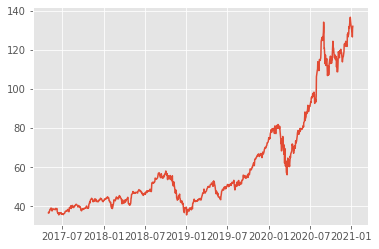

In [26]:
from pandas_datareader import data as web
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import yfinance as yf # *** `fix_yahoo_finance` was renamed to `yfinance`. ***
from datetime import datetime
import pandas as pd

style.use('ggplot') #選擇背景的 Style
yf.pdr_override()
fig = plt.figure()
ax1 = fig.add_subplot(111)
stock = "AAPL" #股票輸入
Analysis = './stockdata.csv' #自己的路徑
start = datetime(2017, 5, 1) #選擇時間
end = datetime.now()
df = web.get_data_yahoo([str(stock)], start, end) #即時抓數據
df.to_csv(Analysis)
data = pd.read_csv(Analysis, parse_dates=True, index_col='Date')
price = data["Close"] 
price.head()
plt.plot(price) #顯示股市
plt.show()

In [34]:
msft = yf.Ticker("MSFT")
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

In [29]:
mavg_fast = price.rolling(5).mean() #選擇短線
mavg_slow = price.rolling(20).mean() #選擇長線
data = data.reset_index() 
data['Date'] = data['Date'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
candlestick = [tuple(x) for x in data[['Date','Open','High','Low','Close']].values]
candlestick_ohlc(ax1, candlestick,, width=0.5, colorup='r',colordown='green',alpha=0.8)
ax1.plot(mavg_fast, color='b', linewidth=1, alpha=0.7, label='MA5')
ax1.plot(mavg_slow, color='r', linewidth=1, alpha=0.7, label='MA20')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-29-c6d5aed5b63f>, line 6)

pip install yfinance
import yfinance as yf
msft = yf.Ticker("MSFT")
msft.info # 這裡可以看到MSFT的公司資訊